# Tutorial 2: Source Classification
https://astronomers.skatelescope.org/ska-science-data-challenge-1/

The last tutorial gave us two different data frames, where one will be used to train the machine learning model, and the other to test the trained model. This notebook will go through the following:

    1- Data exploration
    2- Data pre_processing
    3- Data Visualization
    4- Training
    5- Testing

---

import the dataframes

In [1]:
%store -r sources_training
%store -r sources_full

#### Exploration

In [17]:
print(sources_training[1400].head(3))
print(sources_training[1400].columns)
print(sources_training[1400].shape)

   Source_id  Isl_id          RA      E_RA        DEC     E_DEC    Total_flux  \
0          0       0  359.999746  0.000014 -29.856456  0.000011  9.947102e-07   
1          1       1  359.999413  0.000017 -29.828395  0.000009  4.765558e-06   
2          2       2  359.999746  0.000005 -29.794905  0.000009  2.980899e-06   

   E_Total_flux     Peak_flux   E_Peak_flux  ...  DC_PA_img_plane  \
0  1.908813e-07  6.020551e-07  7.738053e-08  ...        64.362563   
1  4.187382e-07  9.121587e-07  6.799415e-08  ...       104.110879   
2  2.660662e-07  1.288173e-06  8.365145e-08  ...        10.713707   

   E_DC_PA_img_plane  Isl_Total_flux  E_Isl_Total_flux       Isl_rms  \
0          25.682843    5.253248e-07      8.197129e-08  7.220221e-08   
1           8.138976    3.112229e-06      1.788294e-07  7.380012e-08   
2           8.554466    1.931456e-06      1.303469e-07  7.901944e-08   

       Isl_mean  Resid_Isl_rms  Resid_Isl_mean  S_Code  n_gaussians  
0 -3.125654e-08   1.380381e-08   -3.114

The data frame above in its current state is not suited to be used for ML, for the following reasons: 
   * There are columns that need to be excluded, like Source_ID,...
   * Perform corss matching aginst the truth cataluge and get the matched output
   * Include the matched output(ground truth) to perform supervised learning 

---

#### Data pre-processing

In [3]:
from source.utils.bdsf_utils import  load_truth_df
from source.path import train_truth_path
from source.utils.columns import SRL_CAT_COLS, SRL_COLS_TO_DROP, SRL_NUM_COLS
from source.utils.classification import SKLClassification

In [11]:
model_pre = SKLClassification()
train_truth_cat_df = load_truth_df(train_truth_path(1400), skiprows=18) # the tuth cataluge for the training data

"""
Args:
    srl_df (:obj:`pandas.DataFrame`): Source list.
    truth_cat_df (:obj:`pandas.DataFrame`): Truth catalogue.
    regressand_col: (`str`): Regressand column name (output).
    freq: (`int`): Frequency band (MHz).
Returns:
    srl_df (`str`): Crossmatched source list DataFrame used for training.
"""
train_df = model_pre.pre_process(sources_training[1400], train_truth_cat_df, regressand_col="class_t", freq=1400)

2022-06-27 12:14:51,152 [MainThread  ][INFO ] SKAO Science Data Challenge Scoring Pipeline
2022-06-27 12:14:51,154 [MainThread  ][INFO ] Scoring pipeline started
2022-06-27 12:14:51,230 [MainThread  ][INFO ] Catalogue preparation complete. Elapsed time: 0.08s
2022-06-27 12:14:51,499 [MainThread  ][INFO ] [Sdc1XMatch.execute] complete in 0.27s
2022-06-27 12:14:51,501 [MainThread  ][INFO ] Crossmatch runs complete. Elapsed time: 0.35s
2022-06-27 12:14:51,533 [MainThread  ][INFO ] Sieving complete. Elapsed time: 0.38s
2022-06-27 12:14:51,577 [MainThread  ][INFO ] Scoring pipeline complete. Elapsed time: 0.42s
2022-06-27 12:14:51,578 [MainThread  ][INFO ] Final score: 4769.72


---

Data Visualization 

In [13]:
train_df

,Total_flux,E_Total_flux,Peak_flux,E_Peak_flux,Maj,E_Maj,Min,E_Min,Maj_img_plane,E_Maj_img_plane,...,E_DC_PA_img_plane,Isl_Total_flux,E_Isl_Total_flux,Isl_rms,Isl_mean,Resid_Isl_rms,Resid_Isl_mean,S_Code,n_gaussians,class_t
Source_id,,,,,,,,,,,,,,,,,,,,,
0,9.947102e-07,1.908813e-07,6.020551e-07,7.738053e-08,0.000241,0.000034,0.000191,2.245871e-05,0.000241,0.000034,...,25.682843,5.253248e-07,8.197129e-08,7.220221e-08,-3.125654e-08,1.380381e-08,-3.114713e-08,2,1.0,3.0
2,2.980899e-06,2.660662e-07,1.288173e-06,8.365145e-08,0.000309,0.000023,0.000208,1.199040e-05,0.000309,0.000023,...,8.554466,1.931456e-06,1.303469e-07,7.901944e-08,-2.435674e-08,1.658425e-08,-2.374887e-08,2,1.0,3.0
4,2.598173e-06,3.844502e-07,7.295256e-07,8.591499e-08,0.000414,0.000055,0.000239,2.488754e-05,0.000414,0.000055,...,12.657255,1.788939e-06,1.567520e-07,8.636927e-08,-6.577470e-09,3.864574e-08,-6.473210e-09,2,1.0,3.0
6,1.373817e-05,1.442301e-07,1.076811e-05,7.009606e-08,0.000212,0.000002,0.000167,9.832075e-07,0.000212,0.000002,...,1.271685,1.361863e-05,1.571615e-07,6.736965e-08,-1.959572e-08,6.275043e-08,-1.524920e-09,2,1.0,3.0
8,9.946495e-07,1.944150e-07,6.423352e-07,8.192783e-08,0.000250,0.000037,0.000172,1.891089e-05,0.000250,0.000037,...,16.877738,7.285380e-07,1.252937e-07,7.803743e-08,-2.675433e-08,7.523340e-09,-2.678730e-08,2,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6708,2.871248e-06,4.774555e-07,5.882494e-07,8.218375e-08,0.000479,0.000073,0.000283,3.605268e-05,0.000479,0.000073,...,15.981069,1.726275e-06,1.719494e-07,8.744372e-08,-1.770911e-08,3.326524e-08,-1.728183e-08,2,1.0,3.0
6710,1.632200e-06,1.744027e-07,1.307465e-06,8.612252e-08,0.000207,0.000015,0.000167,1.001472e-05,0.000207,0.000015,...,14.035441,1.384411e-06,1.505156e-07,8.293304e-08,-4.031870e-08,1.746509e-08,-3.969632e-08,2,1.0,3.0
6712,4.238288e-06,2.055143e-07,3.143340e-06,9.663476e-08,0.000203,0.000006,0.000185,5.465987e-06,0.000203,0.000006,...,14.448209,3.969446e-06,1.892992e-07,9.132678e-08,-1.258046e-08,2.312150e-08,-1.247706e-08,2,1.0,3.0


Class (output) frequency

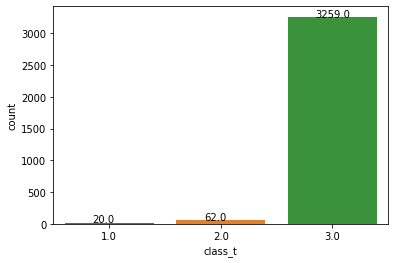

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="class_t",data=train_df)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

---

#### Training

In [22]:
from sklearn.utils import shuffle
 
train_df = shuffle(train_df)
train_x = train_df.drop(['class_t'], axis = 1)
train_y = train_df['class_t']

In [23]:
print("train shape: "+ str(train_x.shape))
print("train shape: "+ str(train_y.shape))

train shape: (3341, 34)
train shape: (3341,)


In this notebook, we will use Random Forest to classify the 3 classes above

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report # this package is used to assess the accuracy of the ML models

In [27]:
forest = RandomForestClassifier(random_state=0)
forest.fit(train_x, train_y)

RandomForestClassifier(random_state=0)

We can try and assess the model aginst the training data

In [28]:
y_pred = forest.predict(train_x)


In [32]:
print(classification_report (train_y, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00        20
         2.0       1.00      1.00      1.00        62
         3.0       1.00      1.00      1.00      3259

    accuracy                           1.00      3341
   macro avg       1.00      1.00      1.00      3341
weighted avg       1.00      1.00      1.00      3341



The score is 100% correct, and that to be expected since the trained model have seen the data pefore, now let us test it aginst the full cataluge (test set)

### Testing